In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from struct import unpack

from sklearn.linear_model import LogisticRegression

/Users/zhanghaibin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def load_mnist(image_file, label_file):
    # Open the images with gzip in read binary mode
    images = open(image_file, 'rb')
    labels = open(label_file, 'rb')
    
    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]
    
    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]
    
    # Get data
    x = np.zeros((N, rows * cols), dtype=np.uint8) # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8) # Initialize numpy array
    for i in range(N):
        for j in range(rows * cols):
            tmp_pixel = images.read(1)
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
        
    images.close()
    labels.close()
    return (x, y)

X_train, y_train = load_mnist('./data/train-images-idx3-ubyte', './data/train-labels-idx1-ubyte')
X_test, y_test = load_mnist('./data/t10k-images-idx3-ubyte', './data/t10k-labels-idx1-ubyte')

In [3]:
X_train.shape

(60000, 784)

In [4]:
X_test, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

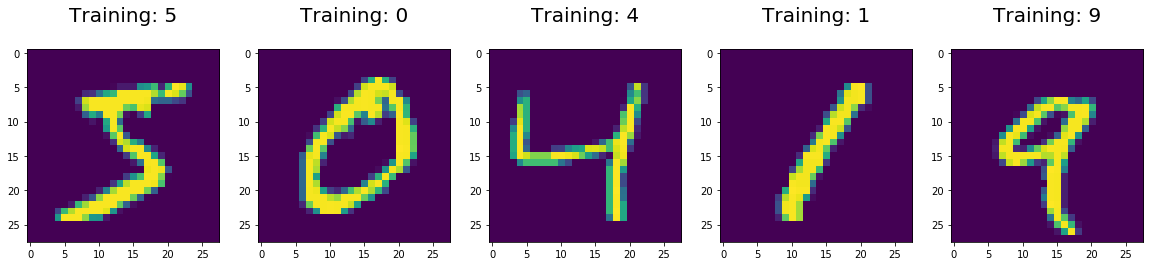

In [5]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)))
    plt.title(f'Training: {label}\n', fontsize=20)

In [6]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train, y_train)

/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanghaibin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: Co

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
clf.coef_, clf.intercept_ 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.51259063e-03, -4.16225555e-04, -2.10761423e-03, -2.69572173e-03,
        -1.42805046e-03,  7.80107997e-05, -2.94774992e-03, -5.58865266e-04,
        -3.95753916e-03, -2.00500328e-03]))

In [8]:
print('Train score', clf.score(X_train, y_train))
print('Test score', clf.score(X_test, y_test))

Train score 0.92615
Test score 0.9179


In [10]:
y_pred = clf.predict(X_test)

classification_report               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.83      0.88      0.86       974
           9       0.90      0.90      0.90      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



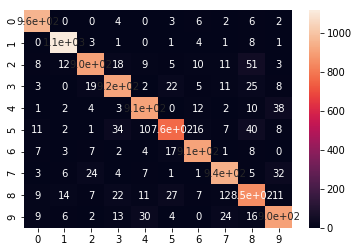

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

print('classification_report', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
sns.heatmap(df_cm, annot=True)